In [93]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [94]:
kumasi_max = xr.open_dataset("kumasi_max.nc")
kumasi_max

<xarray.Dataset>
Dimensions:  (time: 15341, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01T15:00:00 ... 2020-12-31T15:00:00
  * lon      (lon) float64 -1.6
  * lat      (lat) float64 6.72
Data variables:
    mx2t     (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Feb 09 11:26:27 2024: cdo remapnn,lon=-1.60/lat=6.72 Gh...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [95]:
# Load the data for maximum temperature (kumasi_max.nc) and minimum temperature (kumasi_min.nc)

kumasi_min = xr.open_dataset("kumasi_min.nc")
kumasi_min

<xarray.Dataset>
Dimensions:  (time: 15340, lon: 1, lat: 1)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-02T06:00:00 ... 2020-12-31T06:00:00
  * lon      (lon) float64 -1.6
  * lat      (lat) float64 6.72
Data variables:
    mn2t     (time, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Fri Feb 09 11:28:23 2024: cdo remapnn,lon=-1.60/lat=6.72 Gh...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

In [83]:
#selecting_lon_lat_max = kumasi_max.sel(lon=-1.6, lat=6.72, method='nearest')
#selecting_lon_lat_max

In [84]:
#selecting_lon_lat_min = kumasi_min.sel(lon=-1.6, lat=6.72, method='nearest')
#selecting_lon_lat_min

In [96]:

# Calculate monthly average maximum and minimum temperatures
monthly_avg_max_temp = kumasi_max['mx2t'].groupby('time.month').mean(dim='time')
monthly_avg_max_temp


<xarray.DataArray 'mx2t' (month: 12, lat: 1, lon: 1)>
array([[[32.45994261]],

       [[33.25312819]],

       [[32.35669244]],

       [[31.49790328]],

       [[30.31007532]],

       [[28.50123197]],

       [[27.38021457]],

       [[27.48332003]],

       [[28.00556307]],

       [[28.68118415]],

       [[29.52261032]],

       [[30.76631126]]])
Coordinates:
  * lon      (lon) float64 -1.6
  * lat      (lat) float64 6.72
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Maximum temperature at 2 metres since previous post-processing
    units:      K

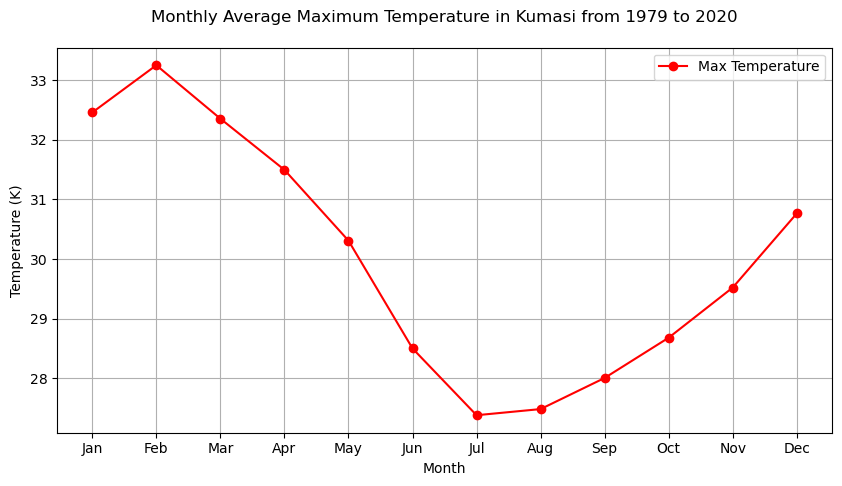

In [114]:
# Plotting the monthly climatological temperature averages for maximum temperature
plt.figure(figsize=(10, 5))
monthly_avg_max_temp.plot(marker='o', color='red')
plt.title('Monthly Average Maximum Temperature in Kumasi from 1979 to 2020\n')
plt.xlabel('Month')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['Max Temperature'])
plt.show()

In [103]:
monthly_avg_min_temp = kumasi_min['mn2t'].groupby('time.month').mean(dim='time')
monthly_avg_min_temp

<xarray.DataArray 'mn2t' (month: 12, lat: 1, lon: 1)>
array([[[22.45778098]],

       [[23.4926791 ]],

       [[23.77316274]],

       [[23.77581199]],

       [[23.36428987]],

       [[22.4760065 ]],

       [[21.77022137]],

       [[21.69832253]],

       [[21.99585213]],

       [[22.23804923]],

       [[22.245763  ]],

       [[22.16232594]]])
Coordinates:
  * lon      (lon) float64 -1.6
  * lat      (lat) float64 6.72
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Minimum temperature at 2 metres since previous post-processing
    units:      K

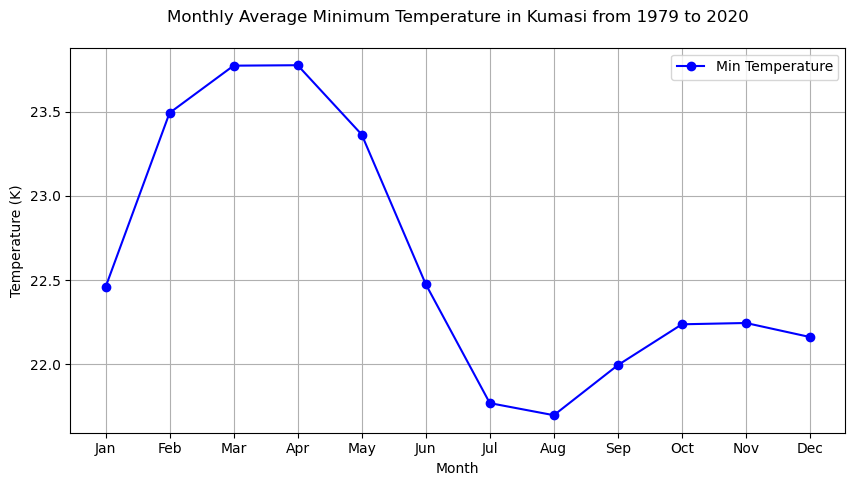

In [110]:
# Plotting the monthly climatological temperature averages for minimum temperature
plt.figure(figsize=(10, 5))
monthly_avg_min_temp.plot(marker='o', color='blue')
plt.title('Monthly Average Minimum Temperature in Kumasi from 1979 to 2020\n')
plt.xlabel('Month')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['Min Temperature'])
plt.show()
